In [148]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
from scipy import stats

In [149]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)

In [150]:
# this replaces all values to nan.
columns_to_replace = ['sqft_basement']
replace_column_w_nan(kcdf, columns_to_replace, '?')

?'s have been replaced with nan in all of these columns ['sqft_basement']


In [151]:
# kcdf = kcdf.dropna(axis=0, subset=['sqft_basement', 'view'])
na_columns = ['view']
drop_na_rows(kcdf, na_columns)

na rows from these columns ,['view'], have been removed.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [152]:
# This successfully removes these columns.
columns_to_drop = ['waterfront', 'yr_renovated','sqft_above','sqft_basement']
drop_columns(kcdf, columns_to_drop)

['waterfront', 'yr_renovated', 'sqft_above', 'sqft_basement'] have been dropped


In [153]:
kcdf.reset_index(inplace=True,drop=True)

In [154]:
kcdf.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,98003,47.3097,-122.327,2238,6819
7,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1960,98146,47.5123,-122.337,1780,8113


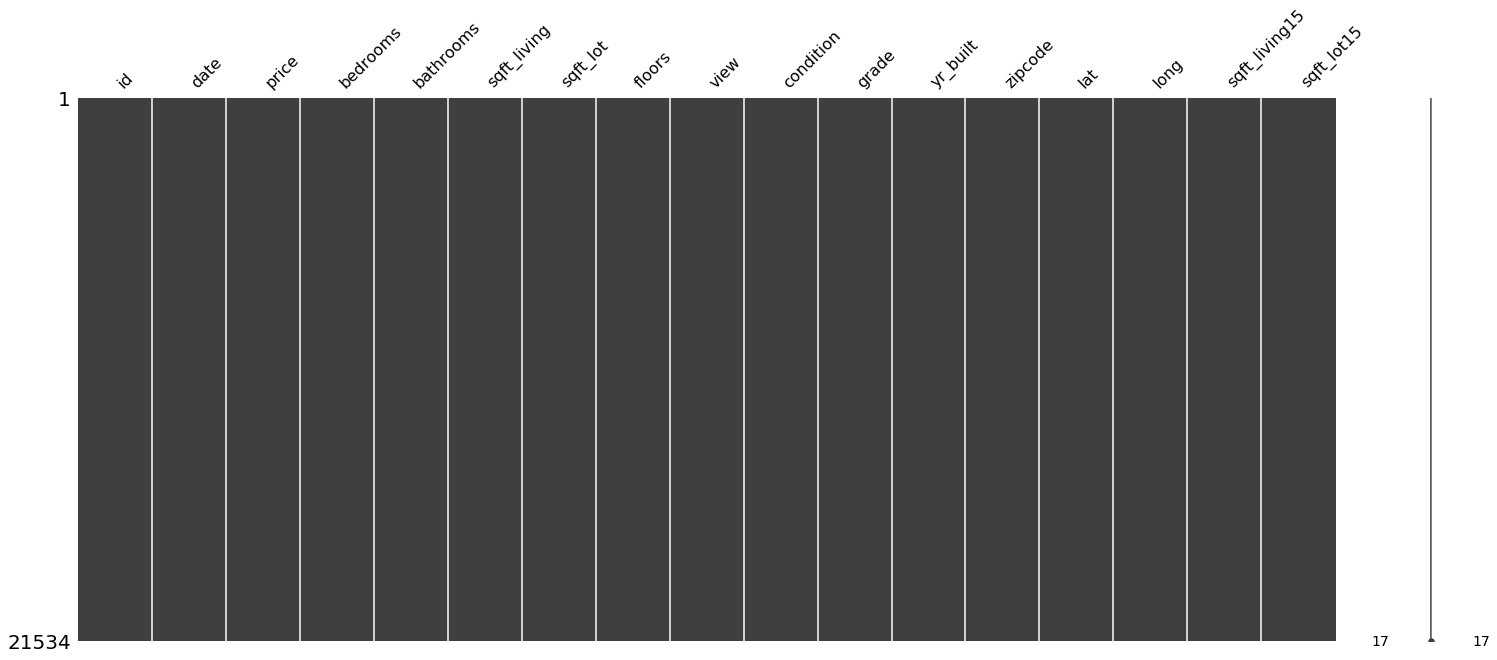

In [155]:
msno.matrix(kcdf)

In [156]:
check_duplicates(kcdf)

You're all clear


In [157]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [158]:
kcdf.shape

(21534, 17)

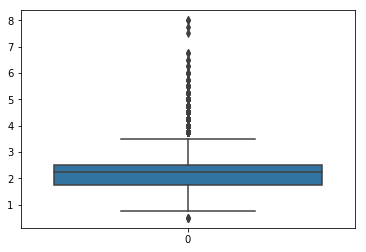

In [159]:
sns.boxplot(data=kcdf['bathrooms'])

We will calculate the z-scores for bathrooms to get rid of outliers. If a z-score is above 3, then we consider it an outlier and will remove it.

In [160]:
bathrooms_zscore = np.abs(stats.zscore(kcdf.bathrooms))
print(bathrooms_zscore)

[1.45164563 0.17472072 1.45164563 ... 1.77691889 0.49999398 1.77691889]


In [161]:
print(np.where(bathrooms_zscore > 3))

(array([    5,   266,   296,   446,   522,  1047,  1092,  1114,  1154,
        1155,  1238,  1252,  1425,  1437,  1649,  1836,  1909,  2101,
        2224,  2333,  2448,  2607,  2613,  2655,  2831,  3006,  3086,
        3106,  3235,  3361,  3367,  3568,  3690,  3703,  3708,  3853,
        3896,  4006,  4017,  4078,  4131,  4237,  4393,  4579,  4677,
        5003,  5096,  5188,  5388,  5676,  5852,  6051,  6205,  6361,
        6470,  6472,  6479,  6978,  7005,  7129,  7160,  7171,  7221,
        7383,  7513,  7618,  7635,  7872,  7954,  7995,  8055,  8154,
        8229,  8506,  8873,  9073,  9074,  9213,  9233,  9334,  9417,
        9769,  9909, 10325, 10558, 10901, 11055, 11122, 11234, 11446,
       11688, 11694, 11924, 11926, 12174, 12229, 12244, 12316, 12531,
       12709, 12721, 13012, 13067, 13258, 13344, 13355, 13652, 13847,
       14022, 14337, 14451, 14493, 14752, 14835, 14916, 14984, 15156,
       15180, 15197, 15487, 15526, 15685, 15727, 15761, 15828, 15845,
       16125, 16380

In [162]:
kcdf[kcdf['bathrooms'] == 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
7221,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,3.0,4,13,1910,98102,47.6298,-122.323,3940,8800
12721,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,4.0,3,12,1999,98053,47.6675,-121.986,4850,217800


In [163]:
kcdf[kcdf['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15803,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1947,98103,47.6878,-122.331,1330,4700


In [164]:
enumerated_bathroom_z_score = enumerate(bathrooms_zscore)

In [165]:
for index, element in enumerated_bathroom_z_score:
    if index == 7245:
        print('first z-score',element)
    elif index == 12764:
        print('second z-score',element)

first z-score 1.451645625059609
second z-score 0.17472071574315579


In [166]:
enumerated_bathroom_z_score = enumerate(bathrooms_zscore)
for index, element in enumerated_bathroom_z_score:
    if element > 3:
        kcdf = kcdf.drop([index])

kcdf.shape 

(21348, 17)

In [167]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.134800e+04,2.134800e+04,21348.000000,21348.000000,21348.000000,2.134800e+04,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000
mean,4.587624e+09,5.298338e+05,3.358301,2.091484,2053.912779,1.488712e+04,1.489976,0.226298,3.411467,7.635704,1970.847152,98078.086191,47.559882,-122.214292,1976.255012,12617.878583
std,2.876697e+09,3.310147e+05,0.910641,0.723988,864.358103,4.074517e+04,0.539004,0.751562,0.651460,1.145029,29.358741,53.498478,0.138803,0.140734,672.528177,26499.683374
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124962e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.027750e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.469950,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.590000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571600,-122.231000,1830.000000,7610.500000
75%,7.326525e+09,6.380000e+05,4.000000,2.500000,2530.000000,1.058725e+04,2.000000,0.000000,4.000000,8.000000,1996.000000,98118.000000,47.678200,-122.125000,2350.000000,10042.000000
max,9.900000e+09,4.490000e+06,33.000000,4.250000,7850.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [168]:
kcdf.reset_index(inplace=True,drop=True)

In [169]:
bedrooms_zscore = np.abs(stats.zscore(kcdf.bedrooms))
print(bedrooms_zscore)

[0.39346897 0.39346897 1.4916224  ... 1.4916224  0.39346897 1.4916224 ]


In [170]:
print(np.where(bedrooms_zscore > 3))

(array([  546,  1119,  1222,  4010,  4176,  4653,  4695,  4802,  6094,
        6935,  8012,  8403,  8514,  8642,  8961,  9014,  9330,  9536,
        9609, 10145, 10652, 10822, 11869, 12451, 12454, 12728, 12962,
       13861, 14031, 14737, 14842, 14889, 14980, 15336, 15483, 15679,
       16118, 16540, 16644, 17033, 17131, 18225, 18258, 18602, 19031,
       19079, 19104]),)


In [171]:
enumerated_bedroom_z_score = enumerate(bedrooms_zscore)
for index, element in enumerated_bedroom_z_score:
    if element > 3:
        kcdf = kcdf.drop([index])

kcdf.shape 

(21301, 17)

Got rid of all our bathroom outliers by dropping the rows with a z-score above 3, but looking below the max number of bathrooms of kcdf is still at 8? Need to look into this more.

In [172]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.130100e+04,2.130100e+04,21301.000000,21301.000000,21301.000000,2.130100e+04,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000
mean,4.588552e+09,5.290905e+05,3.347777,2.089303,2050.985869,1.489689e+04,1.489531,0.226187,3.411248,7.634900,1970.887095,98078.063847,47.559750,-122.214183,1975.873527,12627.651753
std,2.877289e+09,3.295859e+05,0.865555,0.722385,861.676760,4.078791e+04,0.538916,0.751407,0.651379,1.144401,29.345295,53.512833,0.138869,0.140798,672.280276,26526.526949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.029000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.469600,-122.329000,1480.000000,5100.000000
50%,3.905010e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.590000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571400,-122.231000,1830.000000,7611.000000
75%,7.331900e+09,6.370000e+05,4.000000,2.500000,2520.000000,1.058400e+04,2.000000,0.000000,4.000000,8.000000,1996.000000,98118.000000,47.678200,-122.125000,2350.000000,10042.000000
max,9.900000e+09,4.490000e+06,6.000000,4.250000,7850.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [173]:
pickled_KC= pd.to_pickle(kcdf, './data/cleaned_KC.pkl')

In [174]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [175]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,1800,7503
